In [88]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
tqdm.pandas()


In [89]:
cares_data_path = "../data/CARES_continuous.csv"
data = pd.read_csv(cares_data_path)
data.dtypes

AGE                                    int64
GENDER                                object
RCRI score                           float64
Anemia category                       object
PreopEGFRMDRD                        float64
GradeofKidneydisease                  object
DaysbetweenDeathandoperation         float64
@30daymortality                       object
Preoptransfusionwithin30days           int64
Intraop                                int64
Postopwithin30days                     int64
Transfusionintraandpostop              int64
AnaestypeCategory                     object
PriorityCategory                      object
TransfusionIntraandpostopCategory     object
AGEcategory                           object
AGEcategoryOriginal                   object
Mortality                             object
thirtydaymortality                    object
SurgRiskCategory                      object
RaceCategory                          object
CVARCRICategory                       object
IHDRCRICat

In [90]:
#separating only the cont variables and DaysbetweenDeathandoperation
df = data[['Preoptransfusionwithin30days','Intraop','Postopwithin30days','Transfusionintraandpostop','DaysbetweenDeathandoperation','PreopEGFRMDRD','RCRI score','AGE']]

In [91]:
df.dtypes

Preoptransfusionwithin30days      int64
Intraop                           int64
Postopwithin30days                int64
Transfusionintraandpostop         int64
DaysbetweenDeathandoperation    float64
PreopEGFRMDRD                   float64
RCRI score                      float64
AGE                               int64
dtype: object

In [92]:
#considering only non-empty DaysbetweenDeathandoperation as people who died
df_dead = df[df['DaysbetweenDeathandoperation'].notna()]
df_dead.shape

(5591, 8)

In [93]:
#checking empty values in 5591 rows
df_dead.isna().sum()

Preoptransfusionwithin30days       0
Intraop                            0
Postopwithin30days                 0
Transfusionintraandpostop          0
DaysbetweenDeathandoperation       0
PreopEGFRMDRD                    220
RCRI score                      2036
AGE                                0
dtype: int64

##### Plotting PreopEGFRMDRD with empty records

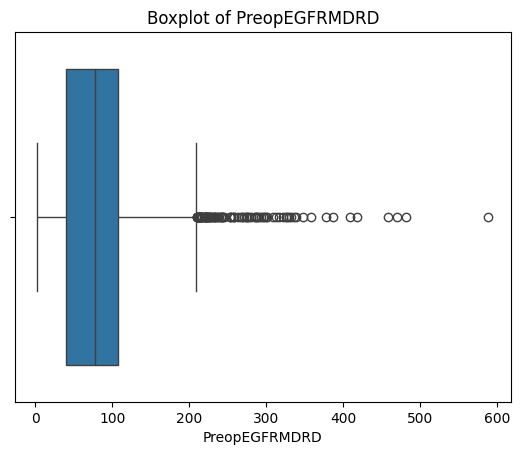

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
sns.boxplot(x=df_dead['PreopEGFRMDRD'])

# Add a title and labels
plt.title('Boxplot of PreopEGFRMDRD')
plt.xlabel('PreopEGFRMDRD')

# Display the plot
plt.show()


In [95]:
df_dead['PreopEGFRMDRD'].describe()

count    5371.000000
mean       78.572905
std        52.254774
min         2.541026
25%        39.364003
50%        76.898013
75%       107.464507
max       588.466578
Name: PreopEGFRMDRD, dtype: float64

In [96]:
dfd = df_dead[(df_dead['PreopEGFRMDRD'] > 209) & (df_dead['PreopEGFRMDRD'] < 588.466578)]
#209 is 1.5 IQR
dfd.shape

(95, 8)

PreopEGFRMDRD median

In [97]:
median = df_dead['PreopEGFRMDRD'].median()
print(median)

76.8980126286732


##### Plotting RCRI with empty records

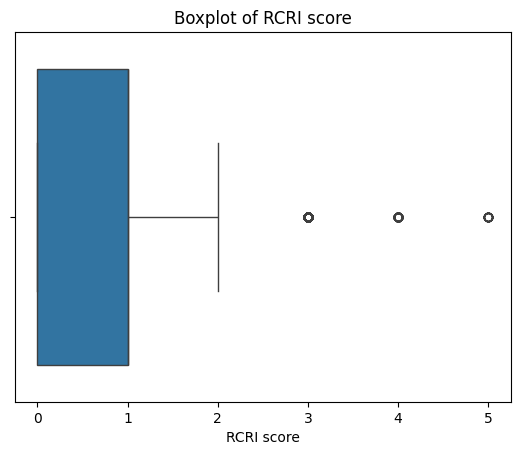

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
sns.boxplot(x=df_dead['RCRI score'])

# Add a title and labels
plt.title('Boxplot of RCRI score')
plt.xlabel('RCRI score')

# Display the plot
plt.show()


In [99]:
df_dead['RCRI score'].describe()

count    3555.000000
mean        0.992686
std         1.024161
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: RCRI score, dtype: float64

In [100]:
df_dead['RCRI score'].value_counts()

RCRI score
1.0    1384
0.0    1315
2.0     532
3.0     235
4.0      69
5.0      20
Name: count, dtype: int64

RCRI median

In [101]:
median_rcri = df_dead['RCRI score'].median()
print(median_rcri)

1.0


### Imputing with Median for both RCRI score and PreopEGFRMDRD

In [102]:
#median = 76.8980126286732
df_dead_imputed = df_dead.copy()
df_dead_imputed['PreopEGFRMDRD'].fillna(76.8980126286732, inplace=True)
df_dead_imputed['RCRI score'].fillna(1.0, inplace=True)

C:\Users\glsam\AppData\Local\Temp\ipykernel_21020\1229134905.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dead_imputed['PreopEGFRMDRD'].fillna(76.8980126286732, inplace=True)
C:\Users\glsam\AppData\Local\Temp\ipykernel_21020\1229134905.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [103]:
df_dead_imputed['PreopEGFRMDRD'].describe()

count    5591.000000
mean       78.507000
std        51.217219
min         2.541026
25%        41.366861
50%        76.898013
75%       105.795592
max       588.466578
Name: PreopEGFRMDRD, dtype: float64

In [104]:
df_dead_imputed['PreopEGFRMDRD'].value_counts()

PreopEGFRMDRD
76.898013     222
112.382587      6
103.500168      5
96.448454       5
136.727095      4
             ... 
7.300964        1
45.812942       1
62.628424       1
38.621983       1
108.123708      1
Name: count, Length: 4444, dtype: int64

In [105]:
df_dead_imputed['RCRI score'].describe()

count    5591.000000
mean        0.995350
std         0.816629
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: RCRI score, dtype: float64

In [106]:
df_dead[df_dead['PreopEGFRMDRD']>98.688]

,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,DaysbetweenDeathandoperation,PreopEGFRMDRD,RCRI score,AGE
103,0,0,0,0,793.0,102.832998,NaN,87
107,0,0,0,0,17.0,99.129633,NaN,61
108,0,0,0,0,433.0,107.520574,0.0,78
109,0,0,0,0,1032.0,104.801171,1.0,75
230,0,0,0,0,155.0,129.079606,1.0,57
...,...,...,...,...,...,...,...,...
78676,3,1,0,1,12.0,103.331556,NaN,74
78753,0,0,0,0,18.0,109.175965,NaN,52
78788,0,0,0,0,230.0,128.321706,NaN,62
78791,3,1,0,1,15.0,269.023482,NaN,49


In [107]:
df_dead_imputed[df_dead_imputed['PreopEGFRMDRD']>98.688]

,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,DaysbetweenDeathandoperation,PreopEGFRMDRD,RCRI score,AGE
103,0,0,0,0,793.0,102.832998,1.0,87
107,0,0,0,0,17.0,99.129633,1.0,61
108,0,0,0,0,433.0,107.520574,0.0,78
109,0,0,0,0,1032.0,104.801171,1.0,75
230,0,0,0,0,155.0,129.079606,1.0,57
...,...,...,...,...,...,...,...,...
78676,3,1,0,1,12.0,103.331556,1.0,74
78753,0,0,0,0,18.0,109.175965,1.0,52
78788,0,0,0,0,230.0,128.321706,1.0,62
78791,3,1,0,1,15.0,269.023482,1.0,49


## Statistical tests for imputed data

Normality tests for imputed data

In [108]:
# List of columns to test
columns = ['Preoptransfusionwithin30days', 'Intraop', 'Postopwithin30days', 
           'Transfusionintraandpostop', 'PreopEGFRMDRD','RCRI score','AGE']

# Create a dictionary to store results
shapiro_results = {}

# Perform the Shapiro-Wilk test for each column
for column in columns:
    data = df_dead_imputed[column]
    stat, p_value = stats.shapiro(data)
    shapiro_results[column] = (stat, p_value)

# Print results
for column, (stat, p_value) in shapiro_results.items():
    print(f'{column}: Statistics={stat:.3f}, p-value={p_value:.400f}')


Preoptransfusionwithin30days: Statistics=0.265, p-value=0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001364456843663592434855801084269018732177090545208258759838672225621198175242016500202273937023849245994314573071492731894919234277186887550041438921404455220181151144731903623592129847009260338136024706900984804105925234313581584366659171791980043053627014160156250000000000000000000000000000000000000000000000
Intraop: Statistics=0.512, p-value=0.0000000000000000000000000000000000000000000000000000000000000000000000000000000002450076706062760129883288449345696729688414745740034567386819379964770921070225896962225998370804730767475214881034802764080541599497432133255045685276878145966840800068126811266288066025859236661473298732327741333847370697185397148132324218750000000000000000000000000000000000000000000000000000000000000000000000000000
Postopwithin30days: Statistics=0.169, p-value=0.0000000000000000000000000000000000000000000000000000000

d:\dev_tools\python\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5591.
  res = hypotest_fun_out(*samples, **kwds)


None of the varaibles are normally distributed as p-value < 0.05

Adding log transformation to the variables

In [109]:
# Apply log transformation with c = 1
df_dead_imputed_log = df_dead_imputed.copy()
for column in columns:
    # Ensure there are no zero or negative values before applying log
    df_dead_imputed_log[column] = np.log(df_dead_imputed_log[column] + 1)

df_dead_imputed_log.head()

,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,DaysbetweenDeathandoperation,PreopEGFRMDRD,RCRI score,AGE
4,0.0,0.0,0.0,0.0,59.0,4.601677,0.000000,4.304065
45,0.0,0.0,0.0,0.0,1063.0,4.573155,0.693147,4.304065
103,0.0,0.0,0.0,0.0,793.0,4.642784,0.693147,4.477337
107,0.0,0.0,0.0,0.0,17.0,4.606466,0.693147,4.127134
108,0.0,0.0,0.0,0.0,433.0,4.686940,0.000000,4.369448


Checking normality of log transformed columns

In [110]:
# List of columns to test
columns = ['Preoptransfusionwithin30days', 'Intraop', 'Postopwithin30days', 
           'Transfusionintraandpostop', 'PreopEGFRMDRD', 'RCRI score', 'AGE']

# Create a dictionary to store results
shapiro_results = {}

# Perform the Shapiro-Wilk test for each column
for column in columns:
    data = df_dead_imputed_log[column]
    stat, p_value = stats.shapiro(data)
    shapiro_results[column] = (stat, p_value)

# Print results
for column, (stat, p_value) in shapiro_results.items():
    print(f'{column}: Statistics={stat:.3f}, p-value={p_value:.400f}')


Preoptransfusionwithin30days: Statistics=0.362, p-value=0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000002416176931286933876487887412991359485073816262398910101213045365350108625218931383537665504407918780510238564537488979038777885845704210392173475085833141127023647646810653291061691013371397901721671137028562218590759663738865015147894155234098434448242187500000000000000000000000000000000000000000000000000000000
Intraop: Statistics=0.512, p-value=0.0000000000000000000000000000000000000000000000000000000000000000000000000000000002450076706062760129883288449345696729688414745740034567386819379964770921070225896962225998370804730767475214881034802764080541599497432133255045685276878145966840800068126811266288066025859236661473298732327741333847370697185397148132324218750000000000000000000000000000000000000000000000000000000000000000000000000000
Postopwithin30days: Statistics=0.247, p-value=0.0000000000000000000000000000000000000000000000000000000

d:\dev_tools\python\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5591.
  res = hypotest_fun_out(*samples, **kwds)


None of them are normally distributed

ANOVA for log transformed variables

In [111]:
import pandas as pd
import scipy.stats as stats

# List of variables to test
variables = ['Preoptransfusionwithin30days', 'Intraop', 'Postopwithin30days', 
              'Transfusionintraandpostop', 'PreopEGFRMDRD', 'RCRI score', 'AGE']

# Convert 'DaysbetweenDeathandoperation' to categorical if it's not already
df_dead_imputed_log['DaysbetweenDeathandoperation'] = pd.Categorical(df_dead_imputed_log['DaysbetweenDeathandoperation'])

# Perform ANOVA for each variable
anova_results = {}

for var in variables:
    # Group the data by 'DaysbetweenDeathandoperation'
    grouped_data = [df_dead_imputed_log[df_dead_imputed_log['DaysbetweenDeathandoperation'] == category][var]
                    for category in df_dead_imputed_log['DaysbetweenDeathandoperation'].cat.categories]
    
    # Perform one-way ANOVA
    f_stat, p_value = stats.f_oneway(*grouped_data)
    anova_results[var] = (f_stat, p_value)

# Print ANOVA results
for var, (f_stat, p_value) in anova_results.items():
    print(f'ANOVA for {var}:')
    print(f'  F-statistic: {f_stat:.3f}')
    print(f'  p-value: {p_value:.3f}')
    print()


ANOVA for Preoptransfusionwithin30days:
  F-statistic: 0.840
  p-value: 1.000

ANOVA for Intraop:
  F-statistic: 1.033
  p-value: 0.227

ANOVA for Postopwithin30days:
  F-statistic: 0.674
  p-value: 1.000

ANOVA for Transfusionintraandpostop:
  F-statistic: 0.911
  p-value: 0.982

ANOVA for PreopEGFRMDRD:
  F-statistic: 0.991
  p-value: 0.576

ANOVA for RCRI score:
  F-statistic: 1.037
  p-value: 0.200

ANOVA for AGE:
  F-statistic: 0.896
  p-value: 0.994



Kruskal-Wallis for log transformed variables

In [112]:
import pandas as pd
import scipy.stats as stats

# List of variables to test
variables = ['Preoptransfusionwithin30days', 'Intraop', 'Postopwithin30days', 
              'Transfusionintraandpostop', 'PreopEGFRMDRD', 'RCRI score', 'AGE']

# Convert 'DaysbetweenDeathandoperation' to categorical if it's not already
df_dead_imputed_log['DaysbetweenDeathandoperation'] = pd.Categorical(df_dead_imputed_log['DaysbetweenDeathandoperation'])

# Perform Kruskal-Wallis test for each variable
kruskal_results = {}

for var in variables:
    # Group the data by 'DaysbetweenDeathandoperation'
    grouped_data = [df_dead_imputed_log[df_dead_imputed_log['DaysbetweenDeathandoperation'] == category][var]
                    for category in df_dead_imputed_log['DaysbetweenDeathandoperation'].cat.categories]
    
    # Perform Kruskal-Wallis test
    h_stat, p_value = stats.kruskal(*grouped_data)
    kruskal_results[var] = (h_stat, p_value)

# Print Kruskal-Wallis test results
for var, (h_stat, p_value) in kruskal_results.items():
    print(f'Kruskal-Wallis test for {var}:')
    print(f'  H-statistic: {h_stat:.3f}')
    print(f'  p-value: {p_value:.3f}')
    print()


Kruskal-Wallis test for Preoptransfusionwithin30days:
  H-statistic: 1366.584
  p-value: 0.775

Kruskal-Wallis test for Intraop:
  H-statistic: 1441.168
  p-value: 0.257

Kruskal-Wallis test for Postopwithin30days:
  H-statistic: 1118.969
  p-value: 1.000

Kruskal-Wallis test for Transfusionintraandpostop:
  H-statistic: 1420.082
  p-value: 0.398

Kruskal-Wallis test for PreopEGFRMDRD:
  H-statistic: 1413.948
  p-value: 0.443

Kruskal-Wallis test for RCRI score:
  H-statistic: 1475.153
  p-value: 0.101

Kruskal-Wallis test for AGE:
  H-statistic: 1327.812
  p-value: 0.934



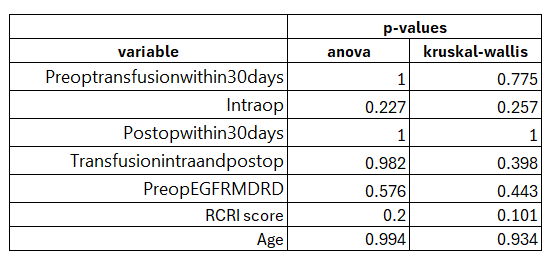

#### Chi-square on imputed binned PreopEGFRMDRD

In [113]:
# Define the combined binning function
def combined_binning(row):
    # Binning for eGFR
    if row['PreopEGFRMDRD'] <= 98.688:
        eGFR_bin = 0
    else:
        eGFR_bin = 1

    # Binning for days
    days = row['DaysbetweenDeathandoperation']
    if days <= 30:
        days_bin = '1 month'
    elif days <= 180:
        days_bin = '6 months'
    elif days <= 730:
        days_bin = '2 years'
    else:
        days_bin = '> 2 years'
    
    # Set the bin values in the row
    return pd.Series([eGFR_bin, days_bin], index=['PreopEGFRMDRD_binned', 'DaysbetweenDeathandoperation_binned'])

# Apply the combined binning function to each row
df_dead_imputed[['PreopEGFRMDRD_binned', 'DaysbetweenDeathandoperation_binned']] = df_dead_imputed.apply(combined_binning, axis=1)

# Display the updated DataFrame
print(df_dead_imputed.head())


     Preoptransfusionwithin30days  Intraop  Postopwithin30days  \
4                               0        0                   0   
45                              0        0                   0   
103                             0        0                   0   
107                             0        0                   0   
108                             0        0                   0   

     Transfusionintraandpostop  DaysbetweenDeathandoperation  PreopEGFRMDRD  \
4                            0                          59.0      98.651255   
45                           0                        1063.0      95.849232   
103                          0                         793.0     102.832998   
107                          0                          17.0      99.129633   
108                          0                         433.0     107.520574   

     RCRI score  AGE  PreopEGFRMDRD_binned DaysbetweenDeathandoperation_binned  
4           0.0   73                     0     

In [114]:
df_dead_imputed['PreopEGFRMDRD_binned'].value_counts()

PreopEGFRMDRD_binned
0    3922
1    1669
Name: count, dtype: int64

In [115]:
df_dead_imputed['DaysbetweenDeathandoperation_binned'].value_counts()

DaysbetweenDeathandoperation_binned
2 years      2337
> 2 years    1441
6 months     1274
1 month       539
Name: count, dtype: int64

In [116]:
print(df_dead_imputed.columns)


Index(['Preoptransfusionwithin30days', 'Intraop', 'Postopwithin30days',
       'Transfusionintraandpostop', 'DaysbetweenDeathandoperation',
       'PreopEGFRMDRD', 'RCRI score', 'AGE', 'PreopEGFRMDRD_binned',
       'DaysbetweenDeathandoperation_binned'],
      dtype='object')


In [117]:
# Create a contingency table
contingency_table = pd.crosstab(df_dead_imputed['PreopEGFRMDRD_binned'], df_dead_imputed['DaysbetweenDeathandoperation_binned'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:") #Expected frequencies 
print(expected)

Contingency Table:
DaysbetweenDeathandoperation_binned  1 month  2 years  6 months  > 2 years
PreopEGFRMDRD_binned                                                      
0                                        416     1575       834       1097
1                                        123      762       440        344

Chi-Square Test Results:
Chi2 Statistic: 59.150703790907606
P-value: 8.926317513635372e-13
Degrees of Freedom: 3
Expected Frequencies:
[[ 378.10016097 1639.36934359  893.69128957 1010.83920587]
 [ 160.89983903  697.63065641  380.30871043  430.16079413]]


Null Hypothesis (H0): There is no association between DaysbetweenDeathandoperation and PreopEGFRMDRD_binned; they are independent. <br>
Alternative Hypothesis (H1): There is an association between DaysbetweenDeathandoperation and PreopEGFRMDRD_binned; they are not independent.<br><br>
Since the p-value is < 0.05, the null hypothesis is rejected.